### Курсовой проект по курсу "Библиотеки Python для Data Science, часть 2"

##### Ник на Kaggle: MyNegative

### Содержание: 
    
* [Начало работы](#chapter1)
    * [Описание датасета](#section_1_1)
    * [Загрузка модулей и библиотек](#section_1_2)
    * [Настройка](#section_1_3)
* [Разведочный анализ данных (EDA)](#chapter2)
    * [Загрузка данных](#section_2_1)
    * [Распределение целевой переменной и матрица корреляций](#section_2_2)
    * [Категориальные признаки](#section_2_3)
    * [Вещественные признаки](#section_2_4)
    * [Построение новых признаков](#section_2_5)
* [Обработка данных (DataPipeline)](#chapter3)
* [Построение модели классификации](#chapter4)
* [Предсказание](#chapter5)

### Начало работы <a class="anchor" id="chapter1"></a>

#### Описание датасета <a class="anchor" id="section_1_1"></a>

    Home Ownership - домовладение
    Annual Income - годовой доход
    Years in current job - количество лет на текущем месте работы
    Tax Liens - налоговые обременения
    Number of Open Accounts - количество открытых счетов
    Years of Credit History - количество лет кредитной истории
    Maximum Open Credit - наибольший открытый кредит (максимальная сумма, которая когда-либо была доступна клиенту)
    Number of Credit Problems - количество проблем с кредитом
    Months since last delinquent - количество месяцев с последней просрочки платежа
    Bankruptcies - банкротства
    Purpose - цель кредита
    Term - срок кредита
    Current Loan Amount - текущая сумма кредита (сумма, которую еще предстоит выплатить клиенту)
    Current Credit Balance - текущий кредитный баланс (сумма, которую может тратить клиент с кредитного счета)
    Monthly Debt - ежемесячный долг
    Credit Score - баллы кредитного рейтинга
    Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)


#### Загрузка модулей и библиотек <a class="anchor" id="section_1_2"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

%matplotlib inline

#### Настройка <a class="anchor" id="section_1_3"></a>

In [2]:
path_to_train = './train.csv'
path_to_test = './test.csv'

pd.set_option('display.max_columns', 17)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Разведочный анализ данных (EDA) <a class="anchor" id="chapter2"></a>

#### Загрузка данных <a class="anchor" id="section_2_1"></a>

In [3]:
df = pd.read_csv(path_to_train)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

Датасет содержит 17 признаков: 4 категориальных и 13 вещественных. Пропуски содержатся в одном категориальном признаке (Years in current job) и четырех вещественных (Annual Income, Months since last delinquent, Bankruptcies, Credit Score)

In [4]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5943.000,7500.000,7500.000,7500.000,7500.000,7500.000,3419.000,7486.000,7500.000,7500.000,7500.000,5943.000,7500.000
mean,1366391.720,0.030,11.131,18.317,945153.727,0.170,34.693,0.117,11873177.445,289833.235,18314.454,1151.087,0.282
std,845339.200,0.272,4.909,7.042,16026216.671,0.499,21.689,0.347,31926122.975,317871.382,11926.765,1604.451,0.450
min,164597.000,0.000,2.000,4.000,0.000,0.000,0.000,0.000,11242.000,0.000,0.000,585.000,0.000
25%,844341.000,0.000,8.000,13.500,279229.500,0.000,16.000,0.000,180169.000,114256.500,10067.500,711.000,0.000
50%,1168386.000,0.000,10.000,17.000,478159.000,0.000,32.000,0.000,309573.000,209323.000,16076.500,731.000,0.000
75%,1640137.000,0.000,14.000,21.800,793501.500,0.000,50.000,0.000,519882.000,360406.250,23818.000,743.000,1.000
max,10149344.000,7.000,43.000,57.700,1304726170.000,7.000,118.000,4.000,99999999.000,6506797.000,136679.000,7510.000,1.000


В некоторых признаках наблюдаются очевидные выбросы:

1. Максимальный годовой доход (Annual Income) составляет 10,15 млн чего-то, то есть 845,7 тысяч в месяц. Такое, конечно, возможно, но вряд ли граждане с таким доходом будут оформлять кредиты
2. Налоговые обременения (Tax Liens). Непонятный признак, допускается
3. Количество открытых счетов (Number of Open Accounts). Можно ограничить до 20, по 2 счета в 10 банках или 5 в 4 и т.д.
4. 57 лет кредитной истории (Years of Credit History) вполне допускается
5. Проблемы с кредитом (Number of Credit Problems). Допускается
6. Максимальное кол-во месяцев с последней просрочки (Months since last delinquent) в 118 месяцев так же допускается, поскольку это всего лишь 9,8 лет
7. Банкротства (Bankruptcies). Физлица могут подавать на банкротство неограниченное число раз, лишь бы соблюдалась периодичность
8. Сумма кредита (Current Loan Amount). Очевидный выброс в 99,9 млн
9. Кредитный баланс (Current Credit Balance) и месячный долг (Monthly Debt) на данном этапе не очевидны, хотя по правилу трех сигм там есть много выбросов
10. Кредитный рейтинг (Credit Score). Выброс очевиден - четырехзначные числа - и, скорее всего, это произошло из-за лишнего нуля

#### Распределение целевой переменной и матрица корреляций <a class="anchor" id="section_2_2"></a>

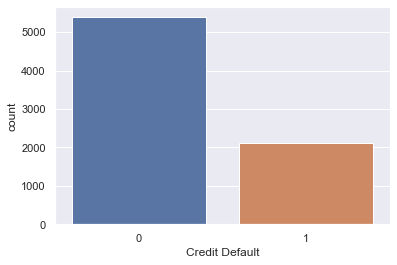

In [5]:
sns.set_theme(style='darkgrid')
sns.countplot(x=df['Credit Default'], data=df)
plt.show()

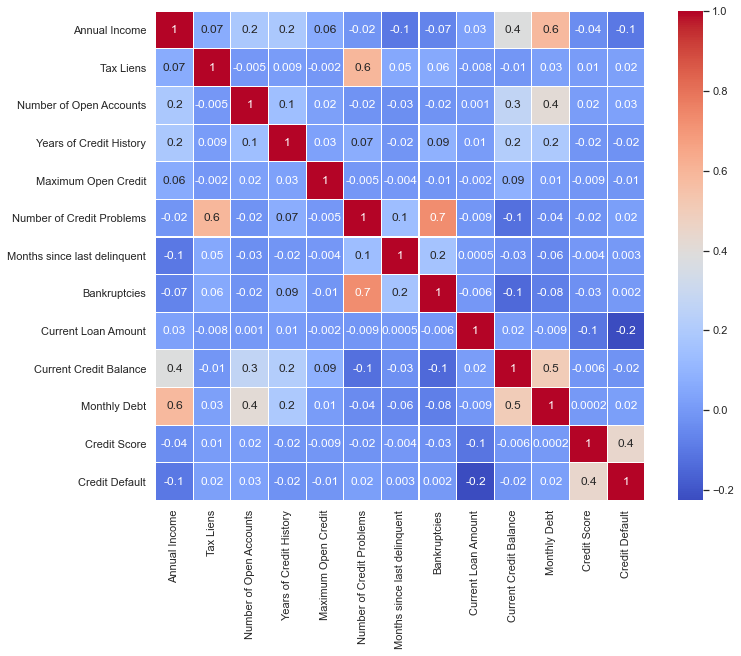

In [6]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), annot=True, linewidth=.1, fmt='.1g', cmap='coolwarm', square=True)
plt.show()

Очень сильной корреляции ( > 0,8) между признаками не наблюдается, но можно сделать следующие выводы:
1. Годовой доход (Annual Income) влияет на размер месячных выплат по кредиту (Monthly Debt)
2. Налоговые обременения (Tax Liens) и банкротства (Bankruptcies) связаны с проблемами по кредиту (Num. of Credit Problems)
3. Размер месячных выплат по кредиту (Monthly Debt) повязан с текущим кредитным балансом (Current Credit Balance)
4. Единственный признак, влияющий на целевой признак (Credit Default), - кредитный рейтинг (Credit Score)

#### Категориальные признаки <a class="anchor" id="section_2_3"></a>

Датасет содержит четыре категориальных признака: **Home Ownership**, **Years in current job**, **Purpose**, **Term**

In [7]:
df['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

В признаке **Home OwnerShip** очевидна ошибка в записях, поэтому можно объединить *Have Mortgage* и *Home Mortgage*

In [8]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

Категориальный признак **Years in current job** можно перевести в вещественный, где "< 1 year" = 0, а "10+ years" = 10

In [9]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

Признак **Purpose** содержит 15 значений, которые в теории можно распределить по группам: Debt Consolidation, Other, House (home improvements + buy house + moving), Social (medical bills + wedding + educational expenses + take a trip + vacation), Business (business loan + small business + renewable energy), Purchase (buy a car + major purchase), после чего трансформировать с помощью dummy-переменных

In [10]:
df['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

Всего два значения, для которых идеально подойдут dummy-переменные

#### Вещественные признаки <a class="anchor" id="section_2_4"></a>

Датасет содержит двенадцать вещественных признаков, не включая целевую переменную: **Annual Income**, **Tax Liens**, **Number of Open Accounts**, **Years of Credit History**, **Maximum Open Credit**, **Number of Credit Problems**, **Months since last delinquent**, **Bankruptcies**, **Current Loan Amount**, **Current Credit Balance**, **Monthly Debt**, **Credit Score**. Признаки **Tax Liens** и **Years of Credit History** за неимением дополнительной информации оставим без изменений

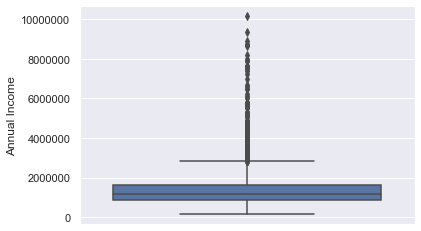

In [11]:
plt.ticklabel_format(style='plain')

sns.boxplot(y='Annual Income', data=df)
plt.show()

Boxplot признака **Annual Income** показывает максимум равный примерно 2 700 000 млн, что в пересчете на 12 месяцев означает 225 тыс/мес, что вполне может соответствовать действительности. Все, что выходит за эти приделы можно привести к сотням тысяч с помощью целочисленного деления на 10, и тогда минимум получится 270 тыс/год, что соответствует 22,5 тыс/мес.

Признак **Annual Income** содержит 1557 пропусков (как и признак **Credit Score**, из чего можно предположить, что пропуски присутствуют в одной и той же строке, но об этом позже). Эти пропуски можно заполнить *медианной зарплатой в зависимости от количества лет на текущем месте работы*

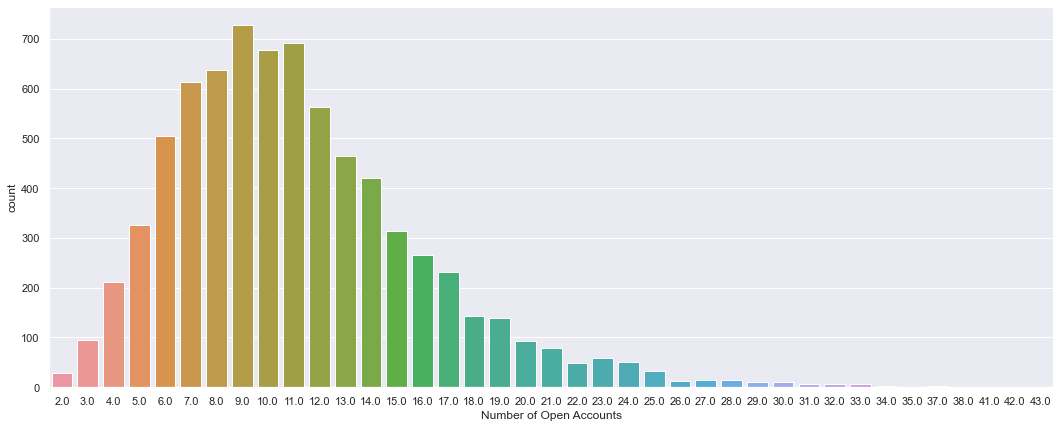

In [12]:
plt.figure(figsize=(18, 7))

sns.countplot(x='Number of Open Accounts', data=df)
plt.show()

Признак **Number of Open Accounts** содержит очевидные, мягко говоря, нереальные выбросы. При стандартном отклонении 4,9 и среднем в 11 выбросами будет считаться все, что выше 26, но как данность рассмотрим максимальное значение в 20, а следовательно все, что больше, преобразуем с помощью целочисленного деления на 10

In [13]:
df['Credit Score'].isna().sum()

1557

Признак **Credit Score** содержит 1557 пропусков, что похоже на ситуацию с признаком **Annual Income**. Для заполнения пропусков применим точно такой же подход, как и с **Annual Income**, то есть *медианное значение в зависимости от количества лет на текущем месте работы* (поскольку для кредитного рейтинга опыт работы важен). Значения кредитного рейтинга более 5000, как и упоминалось выше, преобразуем с помощью целочисленного деления на 10

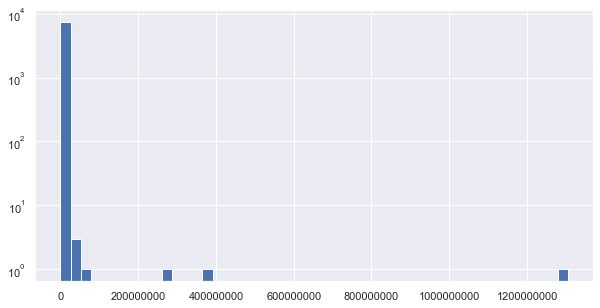

In [14]:
plt.figure(figsize=(10, 5))
plt.ticklabel_format(style='plain')

df['Maximum Open Credit'].hist(bins=50, log=True)
plt.show()

Буквально на днях самый крупный банк России - Сбербанк - увеличил максимальную сумму ипотечного кредита с 60 до 100 млн рублей. 

Поиск **Maximum Open Credit** по нижней границе (60 млн) дает всего три записи (они видны на гистограмме выше), поэтому можно сократить нижнюю границу втрое - до 20 млн рублей (стоимость трехкомнатной квартиры бизнес-класса в Москве, например) и получить целых восемь записей.

Поскольку оставшиеся суммы мы считаем как слишком большие, их можно сократить на 10 (для восьмизначных чисел) и на 100 - для девяти-, десятизначных.

При наличии кредитной истории (то есть **Years of Credit History** != 0, минимальное значение в датасете - 4), максимальный размер кредита не может равняться нулю, иначе и кредитной истории не могло бы быть. В этом случае все записи, в которых **Maximum Open Credit** = 0 (а таких записей в датасете 65) заменим на *значения в зависимости от кредитного рейтинга*

In [15]:
print(f'Количество пропусков признака Months since last delinquent: {df["Months since last delinquent"].isna().sum()}')
print(f'\nМода признака Number of Credit Problems: {df["Number of Credit Problems"].mode()[0]}')
print(f'\nКоличество записей признака Number of Credit Problems, значение которых равно моде признака: ',
     f'{(df["Number of Credit Problems"] == df["Number of Credit Problems"].mode()[0]).sum()}')

Количество пропусков признака Months since last delinquent: 4081

Мода признака Number of Credit Problems: 0.0

Количество записей признака Number of Credit Problems, значение которых равно моде признака:  6469


Признак **Months since last delinquent** логически неразрывно связан с признаком **Number of Credit Problems**, поскольку просрочка - это проблема по кредиту, а раз проблем в кредитной истории не было, то не было и просрочки. Часть пропусков признака **Months since last delinquent** заменим на значение моды признака **Number of Credit Problems**. Это заполнит почти 3,5 тысячи пропусков.

Кроме того, признак **Number of Credit Problems** сделаем бинарным, где 0 - проблемы не было, 1 - проблемы были. Это упрощает задачу, поскольку установить зависимость количества месяцев с последней просрочки по кредиту от количества проблем с кредитом установить невозможно. Оставшиеся пропуски заполним *рандомными значениями от минимального до среднего в зависимости от количества проблем с кредитом*

In [16]:
print(f'Пропуски в признаке Bankruptcies: {df["Bankruptcies"].isna().sum()}')
print(f'Мода признака Bankruptcies: {df["Bankruptcies"].mode()[0]}')

Пропуски в признаке Bankruptcies: 14
Мода признака Bankruptcies: 0.0


Количество пропусков в признаке **Bankruptcies** незначительное, а значит можно заменить на моду признака, не опаясь каких-либо непредвиденных последствий

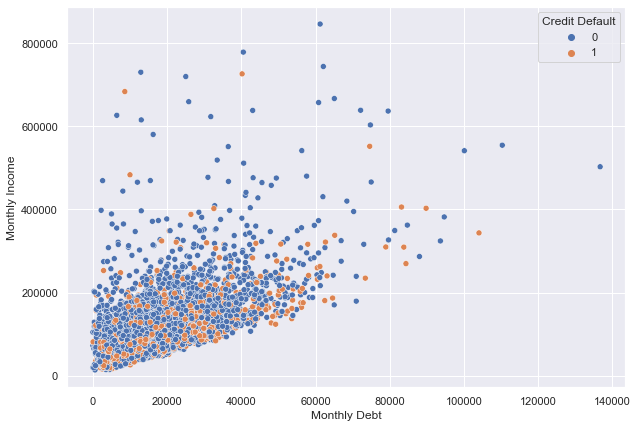

In [17]:
df['Monthly Income'] = round(df['Annual Income'] / 12, 3)

plt.figure(figsize=(10, 7))
plt.ticklabel_format(style='plain')

sns.scatterplot(x='Monthly Debt', y='Monthly Income', hue='Credit Default', data=df)
plt.show()

Создадим новый признак **Monthly Income**, показывающий месячный доход заемщика. Ситуация, при котором месячный платеж, он же **Monthly Debt**, может быть больше месячного дохода имеет место быть в реальной жизни

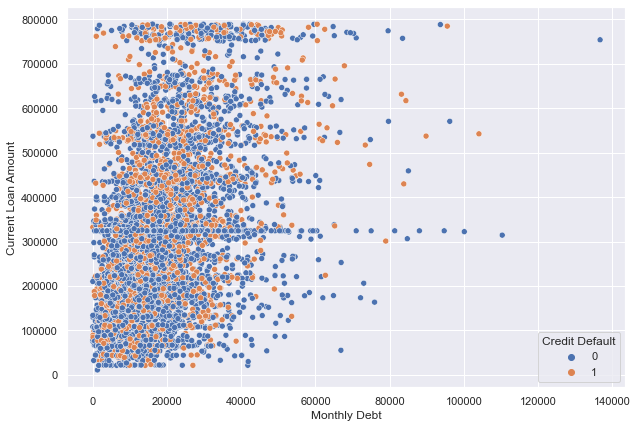

In [18]:
loan = df.groupby(['Purpose'])['Current Loan Amount'].agg('median').to_dict()

df.loc[df['Current Loan Amount'] == 99999999, 'Current Loan Amount'] = df['Purpose'].map(loan)

plt.figure(figsize=(10, 7))
plt.ticklabel_format(style='plain')

sns.scatterplot(x='Monthly Debt', y='Current Loan Amount', hue='Credit Default', data=df)
plt.show()

Датасет содержит 870 записей с явным выбросом в признаке **Current Loan Amount**, где значение признака составляет 99 999 999. Эти значения можно заменить на *медианное значение в зависимости от цели кредита*

#### Построение новых признаков <a class="anchor" id="section_2_5"></a>

In [19]:
df['Credit_is_max'] = 0

credit = (df['Current Loan Amount'] + df['Current Credit Balance'])

df.loc[credit > df['Maximum Open Credit'], 'Credit_is_max'] = 1

Новый бинарный признак **Credit_is_max**, который показывает, превышает ли новый кредит максимальный кредит, который когда-либо был открыт заемщику

In [20]:
df['Debt Weight'] = round(df['Monthly Debt'] / df['Monthly Income'], 2)

Новый признак **Debt Weight**, то есть показатель долговой нагрузки (ПДН), который рассчитывается как отношение ежемесячной выплаты к месячному доходу

### Обработка данных (DataPipeline) <a class="anchor" id="chapter3"></a>

In [21]:
class DataPipeline:
    
    def __init__(self):
        self.years = None
        self.nums = None
        self.num_years = None
        self.inc_score = None
        self.zero_del = None
        self.problems = None
        self.max_credit = None
        
    def fit(self, df):
        
        #Недвижимость
        df.loc[df['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 'Home Mortgage'
        
        #Годы работы
        df.loc[df['Years in current job'].isna(), 'Years in current job'] = df['Years in current job'].mode()[0]
        self.years = df['Years in current job'].value_counts().index.to_list()
        
        self.nums = list(map(int, [n.replace('10+', '10').replace('< 1', '0').replace('year', '').replace('s', '')\
                                   for n in self.years]))
        
        self.num_years = dict(zip(self.years, self.nums))
        
        df['Years in current job'] = df['Years in current job'].map(self.num_years)
        
        #Цель кредита
        house = (df['Purpose'] == 'home improvements') | (df['Purpose'] == 'buy house') | (df['Purpose'] == 'moving')

        social = (df['Purpose'] == 'medical bills') | (df['Purpose'] == 'wedding') |\
            (df['Purpose'] == 'educational expenses') | (df['Purpose'] == 'take a trip') | (df['Purpose'] == 'vacation')

        business = (df['Purpose'] == 'business loan') | (df['Purpose'] == 'small business') |\
            (df['Purpose'] == 'renewable energy')

        purchase = (df['Purpose'] == 'buy a car') | (df['Purpose'] == 'major purchase')

        df.loc[house, 'Purpose'] = 'house'
        df.loc[social, 'Purpose'] = 'social'
        df.loc[purchase, 'Purpose'] = 'purchase'
        df.loc[business, 'Purpose'] = 'business'
        
        #Количество счетов
        df.loc[df['Number of Open Accounts'] > 20, 'Number of Open Accounts'] =\
            df.loc[df['Number of Open Accounts'] > 20, 'Number of Open Accounts'] // 10
        
        #Годовой доход
        df.loc[df['Annual Income'] > 2700000, 'Annual Income'] =\
            df.loc[df['Annual Income'] > 2700000, 'Annual Income'] // 10
        
        self.inc_score = df.groupby(['Years in current job'])[['Annual Income', 'Credit Score',]].agg('median')
        
        df.loc[df['Annual Income'].isna(), 'Annual Income'] = df['Years in current job']\
            .map(self.inc_score['Annual Income'].to_dict())
        
        #Кредитный рейтинг
        df.loc[df['Credit Score'] > 5000, 'Credit Score'] = df.loc[df['Credit Score'] > 5000, 'Credit Score'] // 10
        
        df.loc[df['Credit Score'].isna(), 'Credit Score'] = df['Years in current job']\
            .map(self.inc_score['Credit Score'].to_dict())
        
        #Максимальный размер кредита
        df.loc[df['Maximum Open Credit'] > 100000000, 'Maximum Open Credit'] =\
            df.loc[df['Maximum Open Credit'] > 100000000, 'Maximum Open Credit'] // 100
        df.loc[df['Maximum Open Credit'] > 20000000, 'Maximum Open Credit'] =\
            df.loc[df['Maximum Open Credit'] > 20000000, 'Maximum Open Credit'] // 10
        
        self.max_credit = df.groupby(['Credit Score'])['Maximum Open Credit'].agg('median')
        
        df.loc[df['Maximum Open Credit'] == 0, 'Maximum Open Credit'] = df['Credit Score'].map(self.max_credit.to_dict())
        
        #Количество месяцев с последней просрочки
        self.zero_del = (df['Number of Credit Problems'] == 0) 
        df.loc[self.zero_del, 'Months since last delinquent'] = 0
        
        df.loc[df['Number of Credit Problems'] > 0, 'Number of Credit Problems'] = 1
        
        df.loc[((df['Months since last delinquent'].isna()) & (df['Number of Credit Problems'] == 1)),\
                'Months since last delinquent'] = np.random.randint\
        (df.loc[df['Number of Credit Problems'] == 1, 'Months since last delinquent'].min(),\
         df.loc[df['Number of Credit Problems'] == 1, 'Months since last delinquent'].mean())
            
        #Банкротства
        df.loc[df['Bankruptcies'].isna(), 'Bankruptcies'] = df['Bankruptcies'].mode()[0]
        
        #Текущая сумма кредита
        loan = df.groupby(['Purpose'])['Current Loan Amount'].agg('median').to_dict()

        df.loc[df['Current Loan Amount'] == 99999999, 'Current Loan Amount'] = df['Purpose'].map(loan)
        
        #Срок кредита и dummy-переменные
        df = pd.get_dummies(df, prefix_sep=': ')
        
        #Новый признак - максимальный кредит
        df['Credit_is_max'] = 0

        credit = (df['Current Loan Amount'] + df['Current Credit Balance'])

        df.loc[credit > df['Maximum Open Credit'], 'Credit_is_max'] = 1
        
        #Новые признаки - месячный доход и показатель долговой нагрузки
        df['Monthly Income'] = round(df['Annual Income'] / 12, 3)
        
        df['Debt Weight'] = round(df['Monthly Debt'] / df['Monthly Income'], 2)
        
        return df

In [22]:
def evaluate_preds(model, X_train, X_valid, y_train, y_valid):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
        
    print(f'Train:',
              f'\n\n{classification_report(y_train, y_train_pred)}')
        
    print(f'Valid:',
              f'\n\n{classification_report(y_valid, y_valid_pred)}')
        
    print(f'Confusion matrix:\n {pd.crosstab(y_valid, y_valid_pred)}')

Загрузим заново тренировочный набор данных, обработаем их и затем построим модель

In [23]:
pipe = DataPipeline()

train = pd.read_csv(path_to_train)
train = pipe.fit(train)

### Построение модели классификации <a class="anchor" id="chapter4"></a>

#### Отбор признаков

In [24]:
target_name = 'Credit Default'
feature_names = train.columns.drop(target_name).to_list()

#### Разбиение на train и valid

In [25]:
X = train[feature_names]
y = train[target_name]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, test_size=0.3,
                                                    random_state=42, stratify=y)

display(y_train.value_counts(normalize=True), y_valid.value_counts(normalize=True))

0   0.718
1   0.282
Name: Credit Default, dtype: float64

0   0.718
1   0.282
Name: Credit Default, dtype: float64

In [26]:
disbalance = y_train.value_counts()[0] / y_train.value_counts()[1]
disbalance

2.5496957403651117

#### Построение модели

In [27]:
cat = CatBoostClassifier(silent=True, random_state=42, 
                         class_weights=[1, disbalance], 
                         eval_metric='F1', 
                         early_stopping_rounds=30, 
                         iterations=50, max_depth=3)

evaluate_preds(cat, X_train, X_valid, y_train, y_valid)

Train: 

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      3771
           1       0.44      0.76      0.56      1479

    accuracy                           0.66      5250
   macro avg       0.66      0.69      0.64      5250
weighted avg       0.75      0.66      0.68      5250

Valid: 

              precision    recall  f1-score   support

           0       0.83      0.60      0.70      1616
           1       0.41      0.70      0.51       634

    accuracy                           0.63      2250
   macro avg       0.62      0.65      0.61      2250
weighted avg       0.71      0.63      0.65      2250

Confusion matrix:
 col_0             0    1
Credit Default          
0               976  640
1               193  441


### Предсказание <a class="anchor" id="chapter5"></a>

In [28]:
test = pd.read_csv(path_to_test)

test = pipe.fit(test)

y_test_pred = cat.predict(test)

result = pd.DataFrame({
    'Id': test.index,
    'Credit Default': y_test_pred.flatten()})

result.head(10)

,Id,Credit Default
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [29]:
#result.to_csv('result.csv', index=False)